<a href="https://colab.research.google.com/github/domkoz/DeepLearning_LAB/blob/main/DL_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Edited vs Raw images.

In this report I'm going to analyze the **Real and Fake Face Detection** dataset provided by 
**Computational Intelligence and Photography Lab 
Department of Computer Science, Yonsei University.**


This dataset contains expert-generated high-quality photoshopped face images.
The images are composite of different faces, separated by eyes, nose, mouth, or whole face.

Our target is expressed as **2 classes discriminating between fake and edited images**.

Source: [kaagle.com](https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection)

In [29]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd
import cv2


import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



In [30]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()



In [31]:
#Load data 2.0
fake_dir_datasets = ['/content/FAKE/EASY/','/content/FAKE/MEDIUM/', '/content/FAKE/HARD/']

In [32]:
#Load data
#Real data
real_dir = '../content/REAL/'
real_path = os.listdir(real_dir)
#Edited data

fake_dir = []
fake_path = []
for i, dir in enumerate(fake_dir_datasets):
  fake_dir.append(dir)
  fake_path.append(os.listdir(fake_dir[i]))

In [43]:
IMAGE_SIZE =(600, 600)

In [44]:
def load_img(path):
    '''Loading images from directory 
    and changing color space from cv2 standard BGR to RGB 
    for better visualization'''
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image_rgb

Now we will visualise Real faces

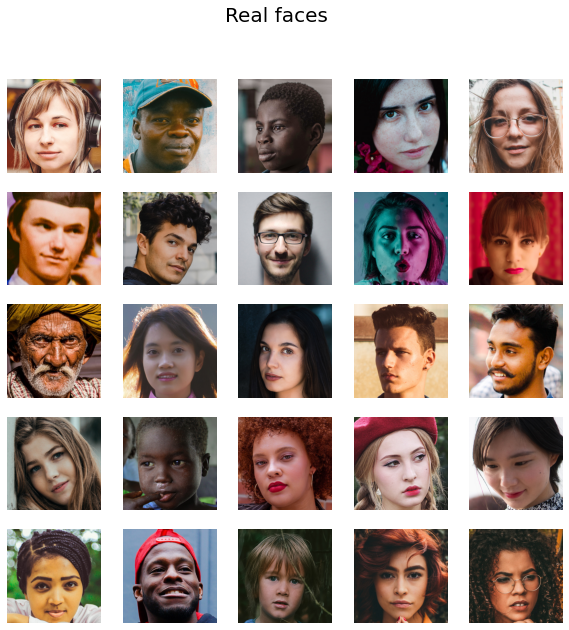

In [45]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    fig.suptitle("Real faces", fontsize = 20)
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(real_dir + real_path[i]))
    # Parameters at the Figure level
    plt.axis('off')

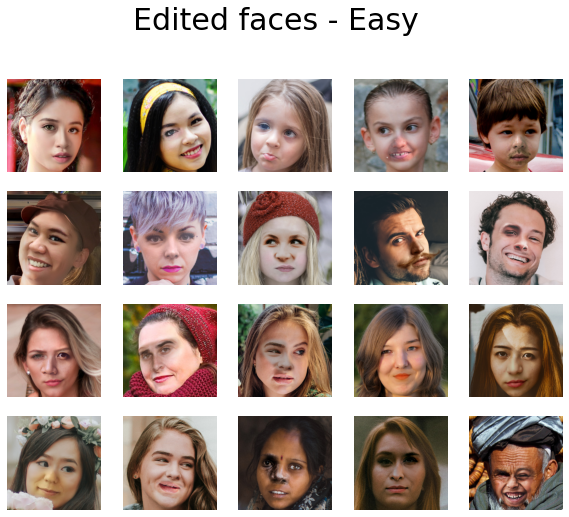

In [36]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Edited faces - Easy",fontsize=30)
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(fake_dir[0] + fake_path[0][i]))
    # Parameters at the Figure level
    plt.axis('off')

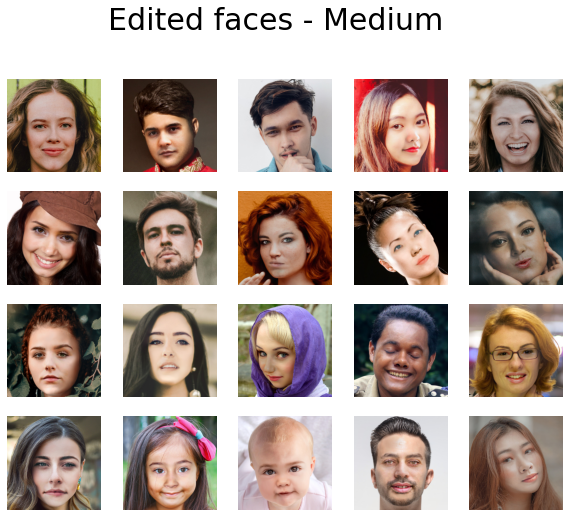

In [37]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Edited faces - Medium",fontsize=30)
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(fake_dir[1] + fake_path[1][i]))
    # Parameters at the Figure level
    plt.axis('off')

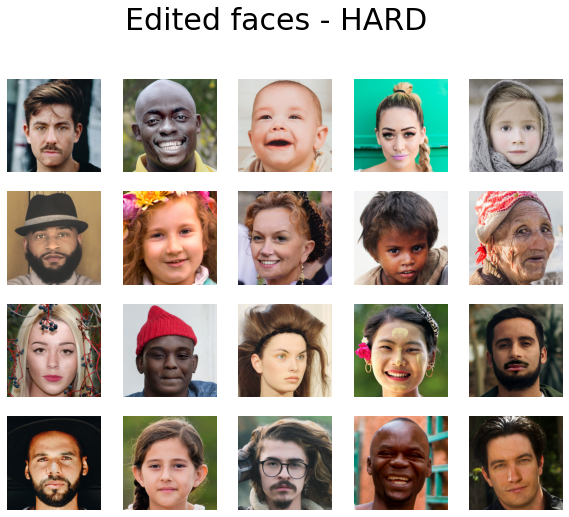

In [38]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Edited faces - HARD",fontsize=30)
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(fake_dir[2] + fake_path[2][i]))
    # Parameters at the Figure level
    plt.axis('off')

In [39]:
real_df = pd.DataFrame({'image_path': real_dir + real_path[i], 'target': 0} for i in range(0, len(real_path)))

fake_df_0 = pd.DataFrame({'image_path': fake_dir[0] + fake_path[0][i], 'target': 1} for i in range(0, len(fake_path[0])))
fake_df_1 = pd.DataFrame({'image_path': fake_dir[1] + fake_path[1][i], 'target': 1} for i in range(0, len(fake_path[1])))
fake_df_2 = pd.DataFrame({'image_path': fake_dir[2] + fake_path[2][i], 'target': 1} for i in range(0, len(fake_path[2])))

df = pd.concat([real_df, fake_df_0,fake_df_1, fake_df_2], ignore_index=True)
df.tail(10)

,image_path,target
1955,/content/FAKE/HARD/hard (6).jpg,1
1956,/content/FAKE/HARD/hard (93).jpg,1
1957,/content/FAKE/HARD/hard (101).jpg,1
1958,/content/FAKE/HARD/hard (145).jpg,1
1959,/content/FAKE/HARD/hard (27).jpg,1
1960,/content/FAKE/HARD/hard (1).jpg,1
1961,/content/FAKE/HARD/hard (115).jpg,1
1962,/content/FAKE/HARD/hard (142).jpg,1
1963,/content/FAKE/HARD/hard (175).jpg,1
1964,/content/FAKE/HARD/hard (186).jpg,1


In [41]:
df = shuffle(df)
df = df.reset_index(drop=True)
df.head(10)

,image_path,target
0,../content/REAL/real_00715.jpg,0
1,/content/FAKE/HARD/hard (9).jpg,1
2,/content/FAKE/MEDIUM/medium (353).jpg,1
3,/content/FAKE/EASY/easy (191).jpg,1
4,../content/REAL/real_00639.jpg,0
5,../content/REAL/real_00242.jpg,0
6,../content/REAL/real_00598.jpg,0
7,../content/REAL/real_00006.jpg,0
8,/content/FAKE/HARD/hard (67).jpg,1
9,../content/REAL/real_00768.jpg,0


In [42]:
df.target.value_counts(normalize=True).apply(lambda x: round(x * 100, 2))

0    53.28
1    46.72
Name: target, dtype: float64

I'm checking for a potential imbalance within a target variable. The ratio of classes is 53:47 and, due to the fact it's relatively small, I decided to ignore this slight imbalance.

 I will further assume that classes will be assigned as:
- 0 - FAKE,
- 1 - TRUE.

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)